Wine Quality Data Set:
In this example I want to train a regression model in order to predict the quality level of different wines. The model is based on the famous wine data set.

In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split


!pip install scikit-learn matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


In [16]:
# Load the Wine Quality dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url, sep=';')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
# Split the dataset into features and target
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [18]:
# Split data into combined training + validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Split combined training + validation set into separate training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.11, random_state=42)

# Print the sizes of each set
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 1280
Validation set size: 159
Test set size: 160


Random Forest Regressor:

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a random forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model with your training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.31536375


Linear Regression:

In [20]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lr_model = LinearRegression()

# Train the model with your training data
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.3816777746717831


Support Vector Regression:

In [21]:
from sklearn.svm import SVR

# Create an SVR model
svr_model = SVR()

# Train the model with your training data
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.5378726823887174


Gradient Boosting Regression:

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a gradient boosting regression model
gb_model = GradientBoostingRegressor()

# Train the model with your training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.36024899013352796


Compare the accuracy based on the MSE of the test data:

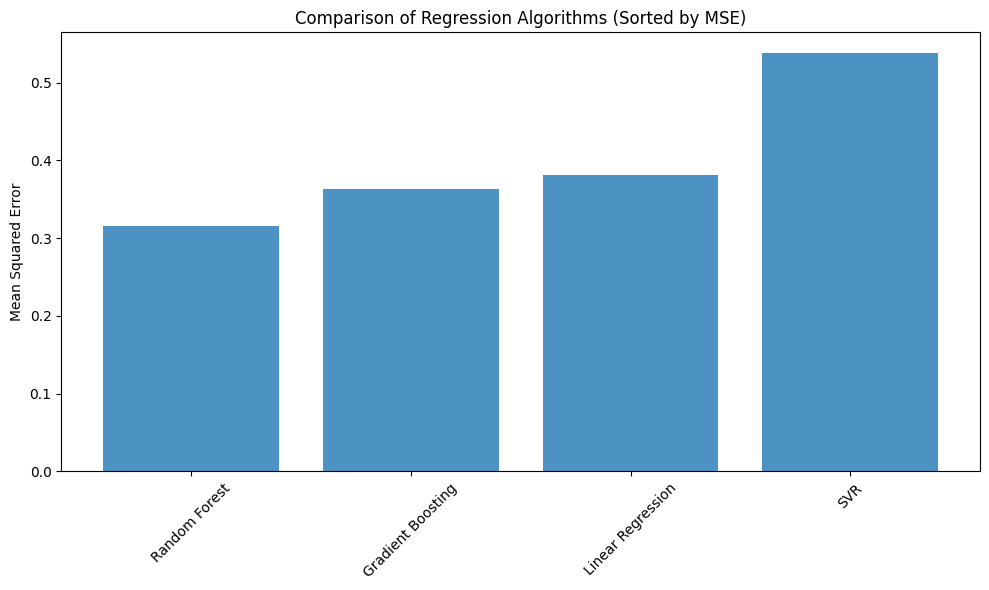

In [23]:
# Create regression models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate models
mse_scores = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append((model_name, mse))

# Sort models by MSE scores
mse_scores = sorted(mse_scores, key=lambda x: x[1])

# Plot the MSE scores
fig, ax = plt.subplots(figsize=(10, 6))
models_names = [x[0] for x in mse_scores]
mse_values = [x[1] for x in mse_scores]
y_pos = np.arange(len(models_names))
ax.bar(y_pos, mse_values, align='center', alpha=0.8)
ax.set_xticks(y_pos)
ax.set_xticklabels(models_names, rotation=45)
ax.set_ylabel('Mean Squared Error')
ax.set_title('Comparison of Regression Algorithms (Sorted by MSE)')
plt.tight_layout()
plt.show()

Now we generate a new MSE for Random Forest, based on the validation data:

In [24]:
# Create a random forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model with your training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_val)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.23708490566037735
